# Analisis descriptivo
- Datos spotify año 2023

# Herramientas
- Lenguaje Python
- Editor de texto Visual Studio Code

# Librerias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('./../data/spotify2023.csv', encoding='latin-1')

In [3]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
print(data.shape)
data.head()

(953, 24)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Transformamos la variable streams de tipo object a tipo float

In [5]:
# A la columna streams la convertimos en entero y eliminamos valores incorrectos
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
# A la columna streams le adicionamos a los elementos eliminados elementos vacios
data['streams'] = data['streams'].replace([np.inf, -np.inf], np.nan)
# Asociamos la columna artistas y el numero de streams totales
artist_streams = data.groupby('artist(s)_name')['streams'].sum() 
# Ordenar los streams de mayor a menor
artist_streams = artist_streams.sort_values(ascending=False) 


In [6]:
moda = data['streams'].mode()
promedio = data['streams'].mean().round(0)
mediana = data['streams'].median()
menor = data['streams'].min()
mayor = data['streams'].max()

print('Moda:')
for elemento in moda:
    print(elemento)
print('Promedio de streams:', promedio)
print('Mediana:',mediana)
print('Pista con menos reproducciones:', menor)
print('Pista con mas reproducciones:', mayor)

Moda:
156338624.0
395591396.0
723894473.0
1223481149.0
Promedio de streams: 514137425.0
Mediana: 290530915.0
Pista con menos reproducciones: 2762.0
Pista con mas reproducciones: 3703895074.0


# Cuantas veces se consta la moda?

In [19]:
data['streams'].value_counts()

streams
7.238945e+08    2
1.563386e+08    2
1.223481e+09    2
3.955914e+08    2
1.695712e+09    1
               ..
4.488437e+08    1
1.357609e+09    1
2.943521e+08    1
9.721650e+08    1
9.600739e+07    1
Name: count, Length: 948, dtype: int64

# Top 10 


In [21]:
artist_streams.head(10)

artist(s)_name
The Weeknd         1.418555e+10
Taylor Swift       1.405366e+10
Ed Sheeran         1.390895e+10
Harry Styles       1.160865e+10
Bad Bunny          9.997800e+09
Olivia Rodrigo     7.442149e+09
Eminem             6.183806e+09
Bruno Mars         5.846921e+09
Arctic Monkeys     5.569807e+09
Imagine Dragons    5.272485e+09
Name: streams, dtype: float64

# Datos faltantes

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    object 
 14  bpm                   953 non-null    int64  
 15  key                   8

 # Remplazamos el dato faltante con el promedio

In [50]:
print(promedio)

data_prom = data
data_prom['streams'].fillna(promedio, inplace=True)
data_prom.iloc[574]

514137425.0


track_name              Love Grows (Where My Rosemary Goes)
artist(s)_name                            Edison Lighthouse
artist_count                                              1
released_year                                          1970
released_month                                            1
released_day                                              1
in_spotify_playlists                                   2877
in_spotify_charts                                         0
streams                                         514137425.0
in_apple_playlists                                       16
in_apple_charts                                           0
in_deezer_playlists                                      54
in_deezer_charts                                          0
in_shazam_charts                                          0
bpm                                                     110
key                                                       A
mode                                    

In [44]:
data_prom[data_prom['streams'].isnull()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [73]:
# Remplazar con la mediana
print(mediana)

data_med = data
data_med.loc[data_med['streams']== promedio] = mediana
data_med.iloc[574]

290530915.0


track_name              Love Grows (Where My Rosemary Goes)
artist(s)_name                            Edison Lighthouse
artist_count                                              1
released_year                                          1970
released_month                                            1
released_day                                              1
in_spotify_playlists                                   2877
in_spotify_charts                                         0
streams                                         290530915.0
in_apple_playlists                                       16
in_apple_charts                                           0
in_deezer_playlists                                      54
in_deezer_charts                                          0
in_shazam_charts                                          0
bpm                                                     110
key                                                       A
mode                                    

# Relacion streams y in_spotify_playlists con respecto a la mediana

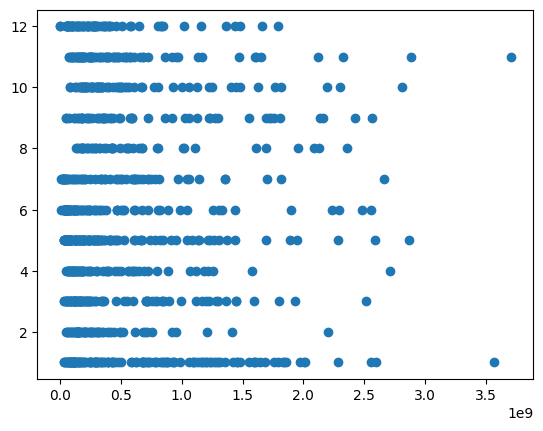

In [72]:
plt.scatter(data_med['streams'], data_med['released_month'])

plt.show()

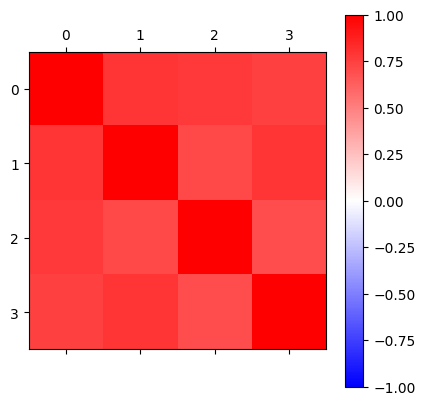

In [94]:
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')
matriz = data[['streams','in_spotify_playlists', 'in_apple_playlists','in_deezer_playlists']].corr()
plt.matshow(matriz, cmap = 'bwr', vmin=-1, vmax=1)
plt.colorbar()
plt.show()

In [97]:
print('min: ', np.quantile(data['streams'],0))
print('Q1: ', np.quantile(data['streams'],0.25))
print('Q2: ', np.quantile(data['streams'],0.5))
print('Q3: ', np.quantile(data['streams'],0.75))
print('max: ', np.quantile(data['streams'],1))

min:  2762.0
Q1:  141720999.0
Q2:  290530915.0
Q3:  673801126.0
max:  3703895074.0
